In [ ]:
%pip install matplotlib
%pip install pandas

In [8]:
import pandas as pd
import json
import functions.evaluetion_functions as ev
import matplotlib.pyplot as plt

# CARREGA DADOS

In [30]:
f = open('nir_ndcg.json')
nir_ndcg = json.load(f)

f = open('els_ndcg.json')
els_ndcg = json.load(f)

metrics = ev.merge(nir_ndcg, els_ndcg)

f = open('nir_recall_precision.json')
nir_f_score = json.load(f)

f = open('els_recall_precision.json')
els_f_score = json.load(f)

df = pd.DataFrame(els_f_score)
with open('recallnir.tex', 'w') as tf:
    tf.write(df[["recall", "precision", "f_scores"]]
             .rename(columns={
                 "recall": "Recuperação", 
                 "precision": "Precisão", 
                 "f_scores":"F score"
                })
             .to_latex(
                index=True,
                caption="Dados de recuperação, precisão e f-score ",
                label="tab:fscorenir",
                escape=False,
                column_format="cccc"
                ))
df

/var/folders/vx/nmy2nsn53mn3fkmfwrv2w5vc0000gn/T/ipykernel_5268/2480059013.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df[["recall", "precision", "f_scores"]]


,query_ids,total_relevants,total_retrieveds,total_retrieved_relevants,recall,precision,f_scores
0,1,29,10,6,0.206897,0.6,0.307692
1,2,25,10,5,0.200000,0.5,0.285714
2,33,4,10,1,0.250000,0.1,0.142857
3,56,11,10,1,0.090909,0.1,0.095238
4,57,15,10,2,0.133333,0.2,0.160000
5,109,6,10,1,0.166667,0.1,0.125000
6,130,6,10,1,0.166667,0.1,0.125000
7,171,4,10,1,0.250000,0.1,0.142857
8,196,13,10,5,0.384615,0.5,0.434783
9,214,5,10,1,0.200000,0.1,0.133333


# AVALIAÇÕES

## F1 - (Recall e Precisão)

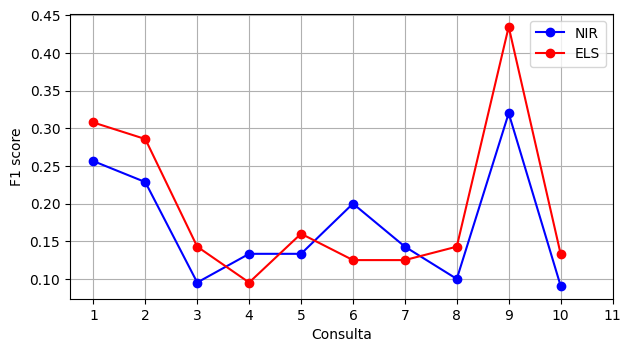

In [31]:
recall_nir = ev.dict_to_list(nir_f_score['f_scores'])[0:10]
recall_els = ev.dict_to_list(els_f_score['f_scores'])[0:10]

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(recall_nir, "o", label="NIR", linestyle='-',color='blue')
ax.plot(recall_els, "o", label="ELS", linestyle='-',color='red')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

#add axis labels to plot
# ax.set_title('F1 Sore')
ax.set_xlabel('Consulta')
ax.set_ylabel('F1 score')
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig("f_score.pdf", format="pdf")

## NDCG@K

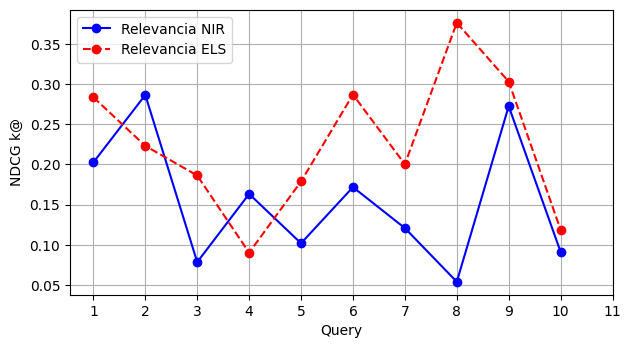

In [32]:
nirndcg = ev.dict_to_list(nir_ndcg['nir_ndcg_k'])[:10]
elsndcg = ev.dict_to_list(els_ndcg['els_ndcg_k'])[:10]

fig, ax = plt.subplots(figsize=(7, 3.7))
ax.plot(nirndcg, 'o', label='Relevancia NIR', linestyle='-', color='blue')
ax.plot(elsndcg, 'o', label='Relevancia ELS', linestyle='--', color='red')

x_stick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
plt.xticks(ticks=x_stick, labels=x_labels)
plt.xticks(ticks=x_stick, labels=x_labels)

ax.set_xlabel('Query')
ax.set_ylabel('NDCG k@')
ax.grid(True)
ax.legend()
plt.savefig("ndcg_k.pdf", format="pdf")